In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from functools import reduce
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
directory = "../data/common/"
folders = [i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]

In [3]:
experiments = dict()
for i in folders:
    tmp = os.listdir(directory + i)
    paths = []
    for j, file in enumerate(tmp):
        if file[-4:] == ".csv":
            paths.append(os.path.join(directory, i, file))
    experiments[i] = paths

In [4]:
def read_filelist(filelist):
    data_list = []
    for i in filelist:
        dataset = pd.read_csv(i)
        dataset = dataset[["Step", "Value"]]
        dataset.Step = dataset.Step.round(-4)
        dataset = dataset.drop_duplicates()
        data_list.append(dataset)
        
    dataset = reduce(lambda x, y: pd.merge(x, y, how="outer", on = 'Step'), data_list)
    dataset = dataset.sort_values(by="Step")
    
    dataset = dataset.fillna(method='ffill')
    dataset["mean"] = dataset.iloc[:,1:].mean(axis=1)
    dataset["max"] =  dataset.iloc[:,1:].max(axis=1)
    dataset["min"] =  dataset.iloc[:,1:].min(axis=1)
    dataset["Step"] = dataset["Step"] / 1e6
    dataset = dataset[dataset["Step"] <= 1]
    return dataset

# Half-Cheetah

In [5]:
ppo_files = experiments["ppo_half_cheetah"]
sac_files = experiments["sac_half_cheetah"]

ppo_dataset = read_filelist(ppo_files)
sac_dataset = read_filelist(sac_files)

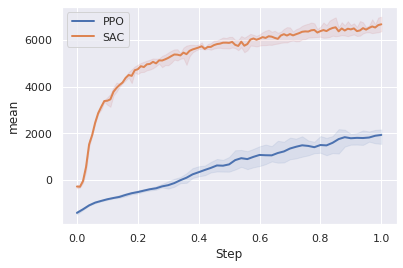

In [6]:
#Plotting:
sns.lineplot(ppo_dataset["Step"], ppo_dataset["mean"], linewidth=2, label="PPO") #mean curve.
plt.fill_between(ppo_dataset["Step"], ppo_dataset["min"], ppo_dataset["max"], color='b', alpha=.1) #std curves.
sns.lineplot(sac_dataset["Step"], sac_dataset["mean"], linewidth=2, label="SAC") #mean curve.
plt.fill_between(sac_dataset["Step"], sac_dataset["min"], sac_dataset["max"], color='r', alpha=.1) #std curves.

# Hopper

In [7]:
ppo_files = experiments["ppo_hopper"]
sac_files = experiments["sac_hopper"]

ppo_dataset = read_filelist(ppo_files)
sac_dataset = read_filelist(sac_files)

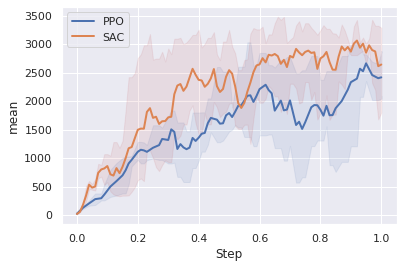

In [8]:
#Plotting:
sns.lineplot(ppo_dataset["Step"], ppo_dataset["mean"], linewidth=2, label="PPO") #mean curve.
plt.fill_between(ppo_dataset["Step"], ppo_dataset["min"], ppo_dataset["max"], color='b', alpha=.1) #std curves.
sns.lineplot(sac_dataset["Step"], sac_dataset["mean"], linewidth=2, label="SAC") #mean curve.
plt.fill_between(sac_dataset["Step"], sac_dataset["min"], sac_dataset["max"], color='r', alpha=.1) #std curves.